In [2]:
from iohblade.loggers import ExperimentLogger
from iohblade import plot_convergence, plot_experiment_CEG
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json


logger = ExperimentLogger('../results/kerneltuner-gemini-2.0', True)
logger.add_read_dir('../results/kerneltuner-o4')
logger.add_read_dir('../results/kerneltuner-o4-no-info')

In [3]:
methods, problems = logger.get_methods_problems()
print(methods)
print(problems)

['o4-mini', 'o4 (no info)', 'gemini-2.0']
['kerneltuner-gemm', 'kerneltuner-convolution', 'kerneltuner-dedispersion', 'kerneltuner-hotspot']


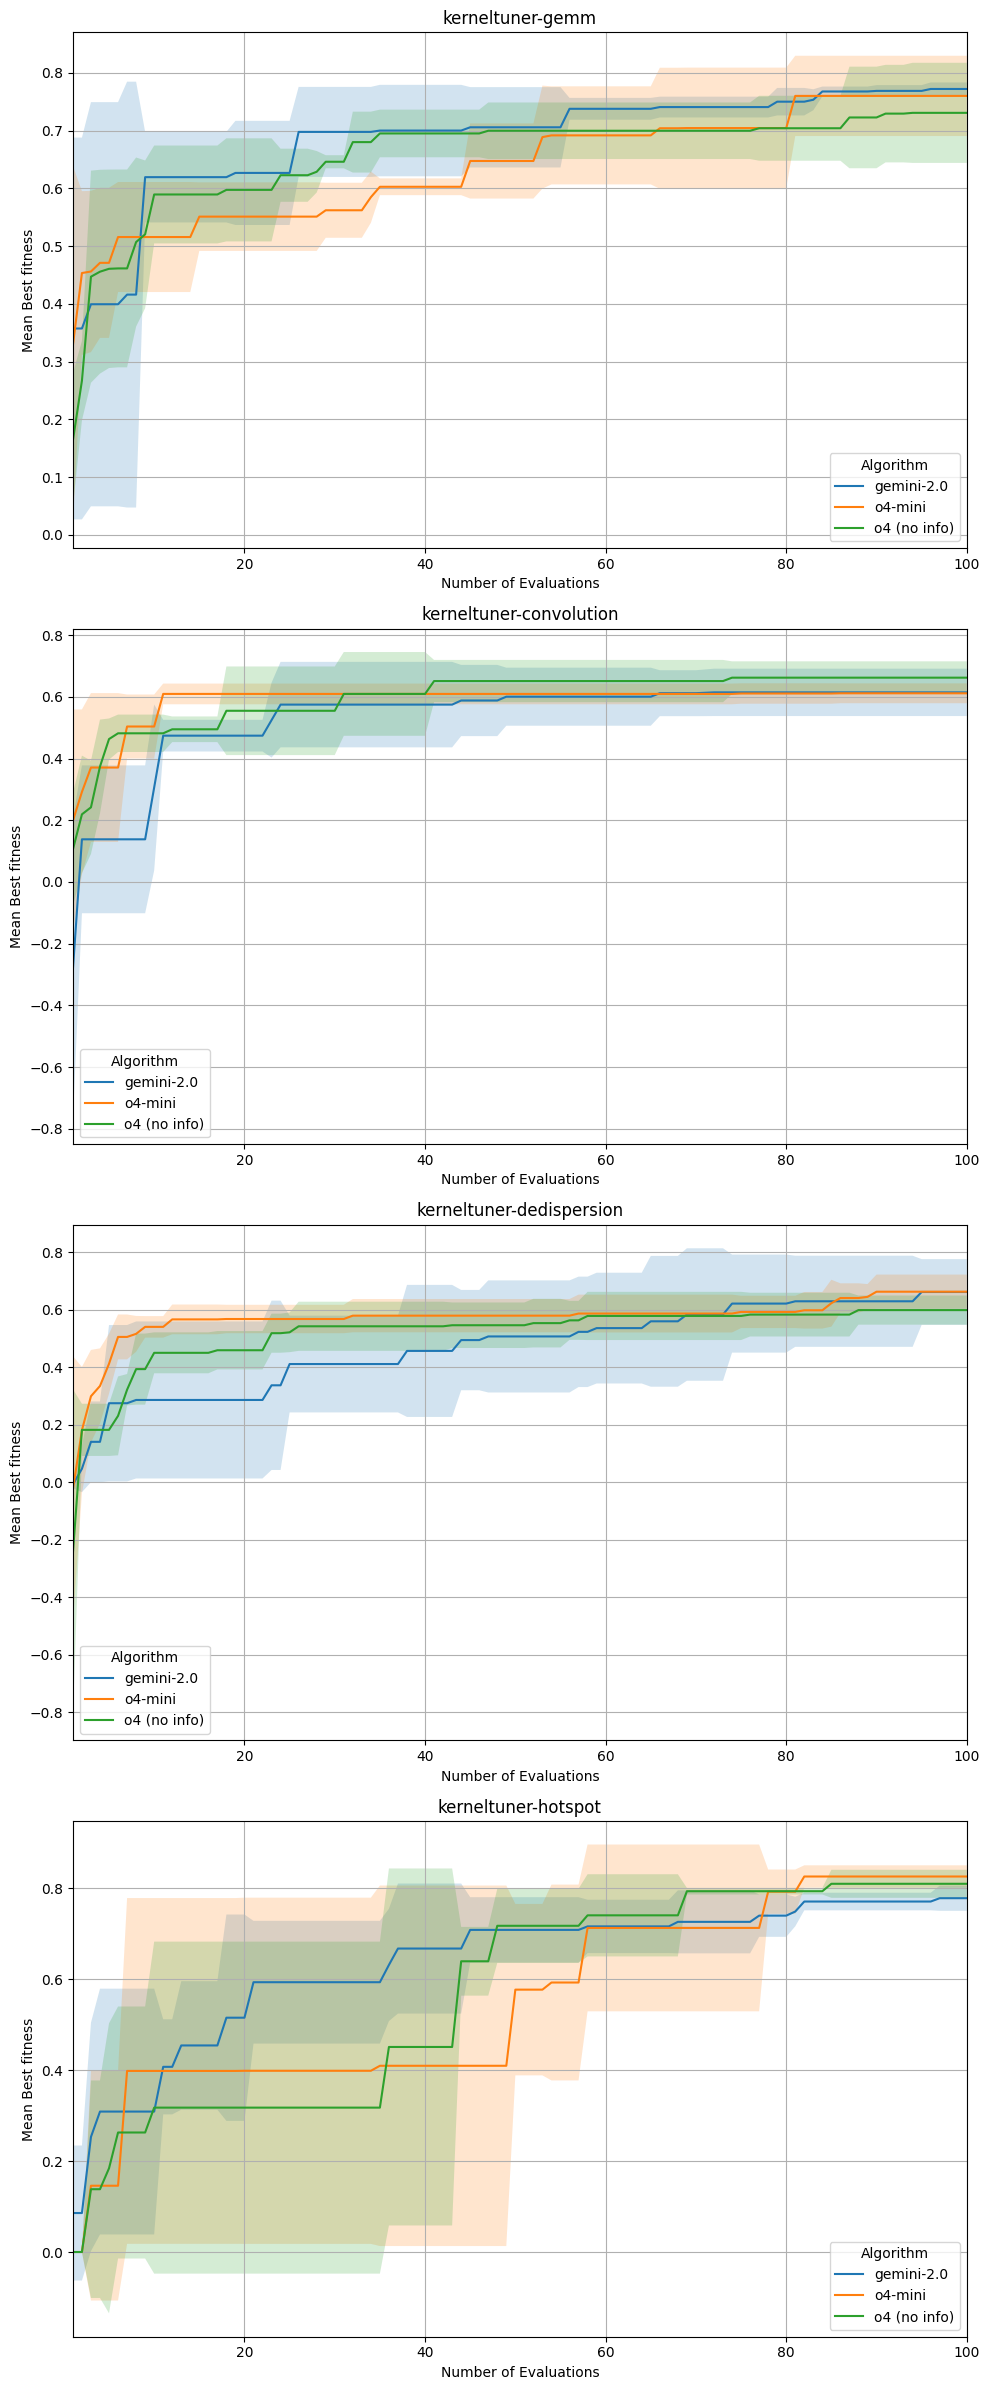

kerneltuner-gemm 265 AdaptiveBanditVNS o4-mini
kerneltuner-gemm 293 AdaptiveVNSTuner o4 (no info)
kerneltuner-gemm 289 HybridGLSPopulationTrainingMutationSA gemini-2.0
kerneltuner-convolution 110 MABAdaptiveVNS o4-mini
kerneltuner-convolution 217 PSVNMemetic o4 (no info)
kerneltuner-convolution 170 ReinforcementLearningTuner gemini-2.0
kerneltuner-dedispersion 189 AnnealedHarmonySearch o4-mini
kerneltuner-dedispersion 257 AUSSAC o4 (no info)
kerneltuner-dedispersion 64 AdaptiveIteratedLocalSearchEnhanced gemini-2.0
kerneltuner-hotspot 281 MemeticConstraintGA o4-mini
kerneltuner-hotspot 284 AdaptiveTabuPathRelinking o4 (no info)
kerneltuner-hotspot 96 EnhancedHybridGeneticHillClimberSimplified gemini-2.0


In [7]:

plot_convergence(logger, metric="fitness", save=False, budget=100)

method_names = {"gemini-2.0": "gemini-2.0",
                "o4-mini": "o4-mini",
                "o4 (no info)": "o4-no-info"}

for problem in problems:
    data = logger.get_problem_data(problem_name=problem)
    for method in methods:
        # first on method
        method_data = data[data['method_name'] == method].copy().reset_index()
        idx = method_data['fitness'].idxmax()
        print(problem, idx, method_data.iloc[idx]['name'], method)
        with open(f'../results/kerneltuner-algs/alg-{problem}-{method_names[method]}.py', 'w', encoding='utf-8') as f:
            f.write(method_data.iloc[idx]['code'])

